C:\Users\TottaraDhanush\AppData\Local\Temp\ipykernel_12764\2670649260.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].astype(str))
C:\Users\TottaraDhanush\AppData\Local\Temp\ipykernel_12764\2670649260.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].astype(str))
C:\Users\TottaraDhanush\AppData\Local\Temp\ipykernel_12764\2670649260.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

XGBoost RMSE: 2.929617216762966
XGBoost MAE: 2.2632134979634455
XGBoost R²: 0.9745674868771284


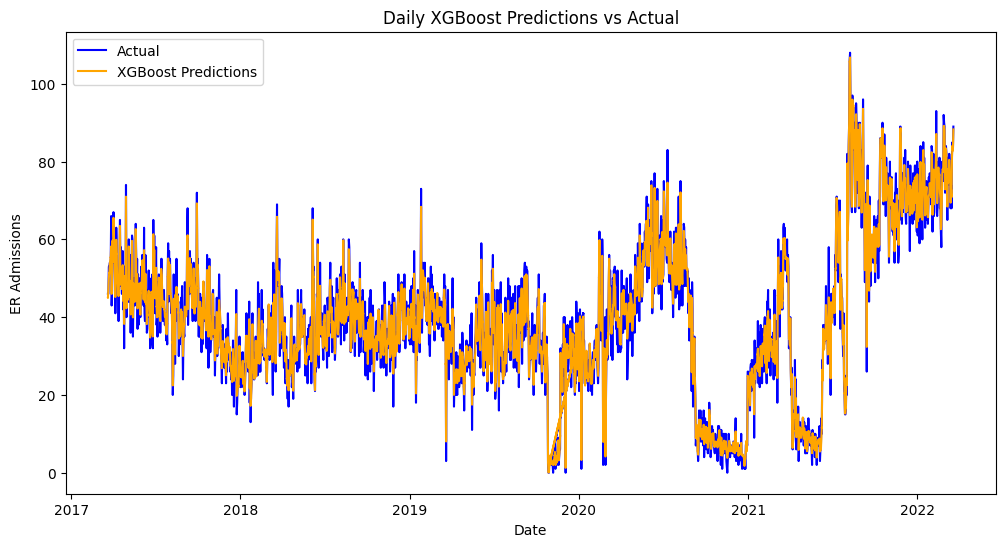

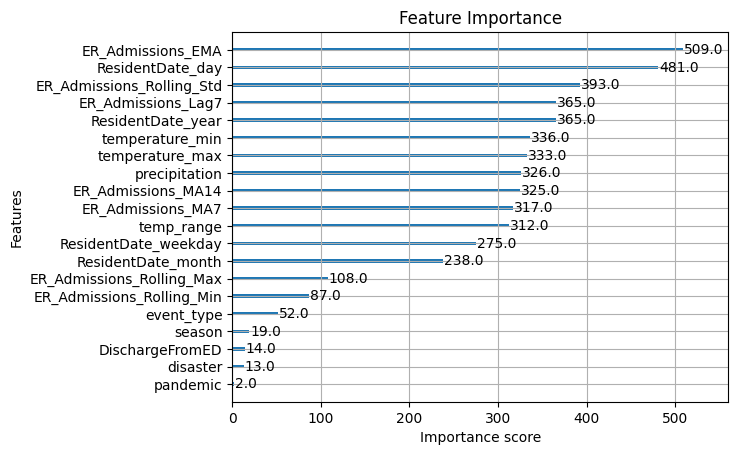

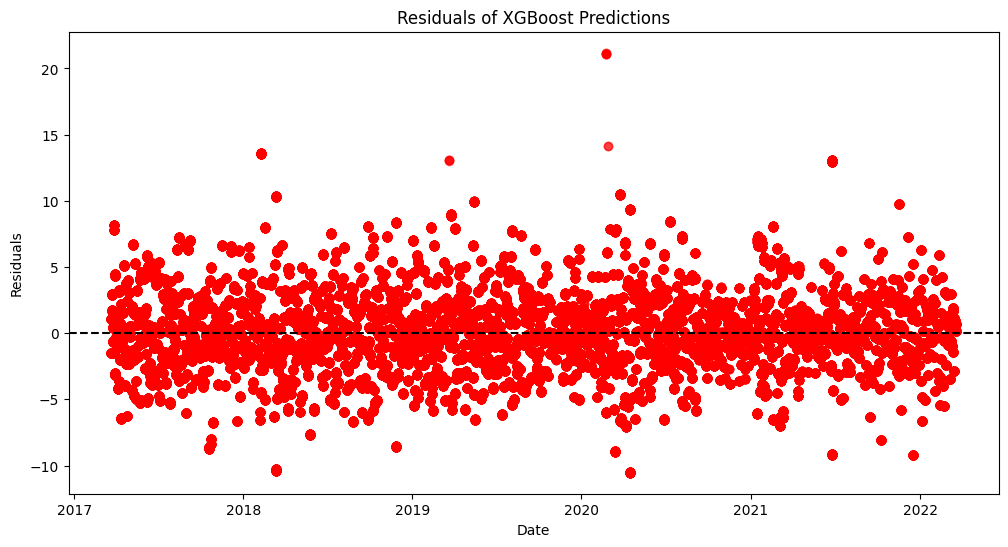

In [6]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the cleaned dataset
df = pd.read_csv("/finalproject/feature_engineering/classification_data.csv")

# Convert 'ResidentDate' to datetime format
df['ResidentDate'] = pd.to_datetime(df['ResidentDate'])

# Set 'ResidentDate' as index
df.set_index('ResidentDate', inplace=True)

# Define the target column and features
target = 'ER_Admissions_Lag1'  # Replace with actual target column
features = [col for col in df.columns if col != target]

# Separate features and target
X = df[features]
y = df[target]

# Convert categorical columns into numerical if needed
# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Apply LabelEncoding to categorical columns
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    X[col] = le.fit_transform(X[col].astype(str))

# ========== Train the XGBoost Model ==========
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb_model.fit(X, y)
xgb_pred = xgb_model.predict(X)

# Calculate performance metrics
xgb_rmse = np.sqrt(mean_squared_error(y, xgb_pred))
mae = mean_absolute_error(y, xgb_pred)
r2 = r2_score(y, xgb_pred)

print(f"XGBoost RMSE: {xgb_rmse}")
print(f"XGBoost MAE: {mae}")
print(f"XGBoost R²: {r2}")

# ========== Prepare Results for Daily Predictions ==========
# Combine actual and predicted values into a DataFrame
results = pd.DataFrame({
    'Actual': y,
    'XGBoost_Pred': xgb_pred
}, index=y.index)

# ========== Plot Daily Predictions ==========
plt.figure(figsize=(12, 6))
plt.plot(results.index, results['Actual'], label='Actual', color='blue')
plt.plot(results.index, results['XGBoost_Pred'], label='XGBoost Predictions', color='orange')
plt.legend()
plt.title("Daily XGBoost Predictions vs Actual")
plt.xlabel("Date")
plt.ylabel("ER Admissions")
plt.show()

# ========== Plot Feature Importance ==========
xgb.plot_importance(xgb_model,  importance_type='weight', title='Feature Importance')
plt.show()

# ========== Residual Analysis ==========
residuals = y - xgb_pred

plt.figure(figsize=(12, 6))
plt.scatter(results.index, residuals, color='red', alpha=0.5)
plt.axhline(0, color='black', linestyle='--')
plt.title("Residuals of XGBoost Predictions")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.show()

C:\Users\TottaraDhanush\AppData\Local\Temp\ipykernel_12764\2888311253.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].astype(str))
C:\Users\TottaraDhanush\AppData\Local\Temp\ipykernel_12764\2888311253.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].astype(str))
C:\Users\TottaraDhanush\AppData\Local\Temp\ipykernel_12764\2888311253.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

XGBoost RMSE: 10.55488085579731
XGBoost MAE: 7.7968607669865735
XGBoost R²: 0.8302394645253145


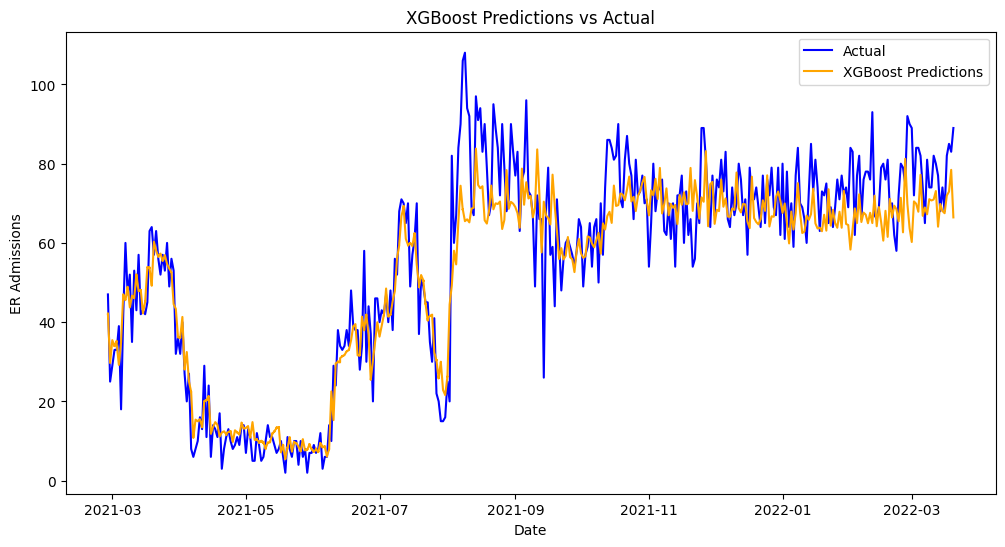

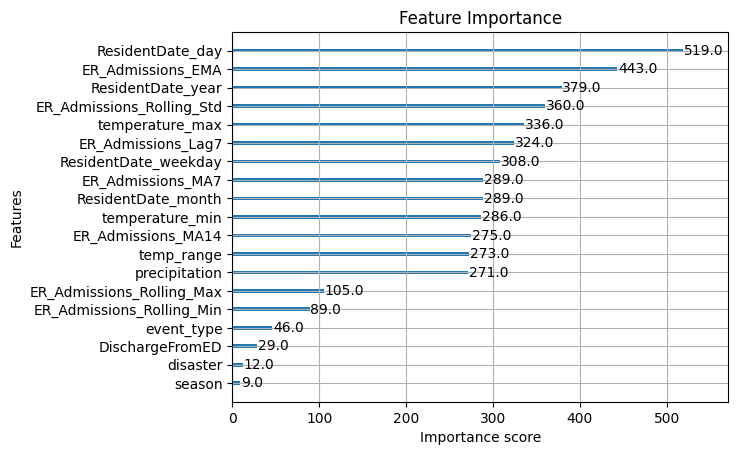

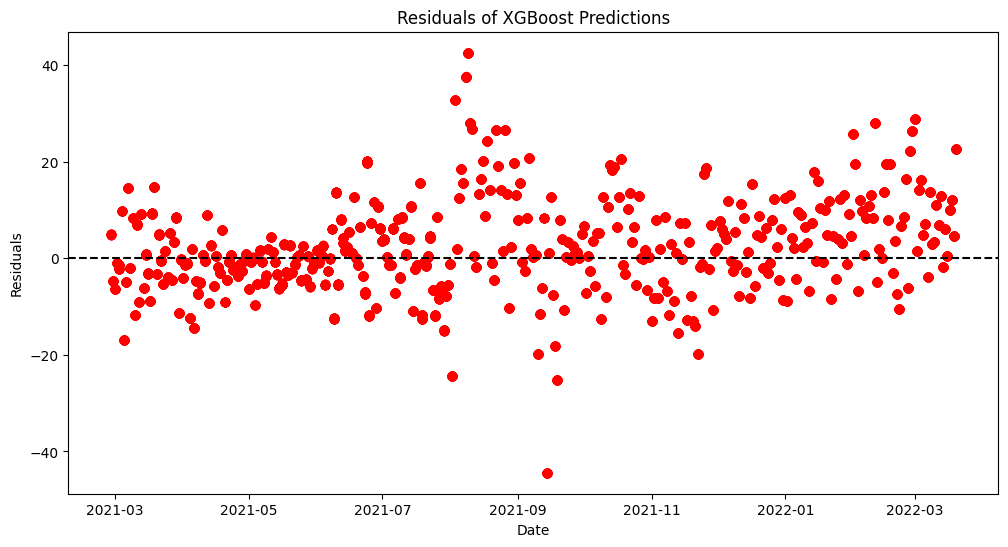

In [7]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load the cleaned dataset
df = pd.read_csv("/finalproject/feature_engineering/classification_data.csv")

# Convert 'ResidentDate' to datetime format
df['ResidentDate'] = pd.to_datetime(df['ResidentDate'])

# Set 'ResidentDate' as index
df.set_index('ResidentDate', inplace=True)

# Define the target column and features
target = 'ER_Admissions_Lag1'  # Replace with actual target column
features = [col for col in df.columns if col != target]

# Separate features and target
X = df[features]
y = df[target]

# Convert categorical columns into numerical if needed
# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Apply LabelEncoding to categorical columns
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    X[col] = le.fit_transform(X[col].astype(str))

# Train-test split (Time series typically uses time order, so don't shuffle)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# ========== Train the XGBoost Model ==========
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# Calculate performance metrics
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
mae = mean_absolute_error(y_test, xgb_pred)
r2 = r2_score(y_test, xgb_pred)

print(f"XGBoost RMSE: {xgb_rmse}")
print(f"XGBoost MAE: {mae}")
print(f"XGBoost R²: {r2}")

# ========== Plot Predictions ==========
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual', color='blue')
plt.plot(y_test.index, xgb_pred, label='XGBoost Predictions', color='orange')
plt.legend()
plt.title("XGBoost Predictions vs Actual")
plt.xlabel("Date")
plt.ylabel("ER Admissions")
plt.show()

# ========== Plot Feature Importance ==========
xgb.plot_importance(xgb_model,  importance_type='weight', title='Feature Importance')
plt.show()

# ========== Residual Analysis ==========
residuals = y_test - xgb_pred

plt.figure(figsize=(12, 6))
plt.scatter(y_test.index, residuals, color='red', alpha=0.5)
plt.axhline(0, color='black', linestyle='--')
plt.title("Residuals of XGBoost Predictions")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.show()

C:\Users\TottaraDhanush\AppData\Local\Temp\ipykernel_12764\4120879146.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].astype(str))
C:\Users\TottaraDhanush\AppData\Local\Temp\ipykernel_12764\4120879146.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].astype(str))
C:\Users\TottaraDhanush\AppData\Local\Temp\ipykernel_12764\4120879146.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best XGBoost Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
XGBoost RMSE after Hyperparameter Tuning: 10.018853991193268
XGBoost MAE after Hyperparameter Tuning: 7.405564879519123
XGBoost R² after Hyperparameter Tuning: 0.8470441256997815


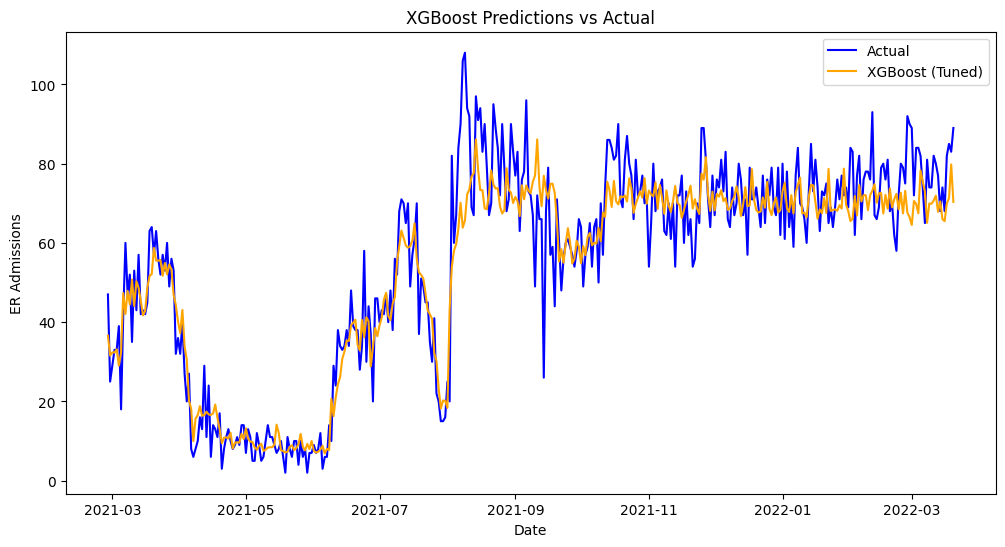

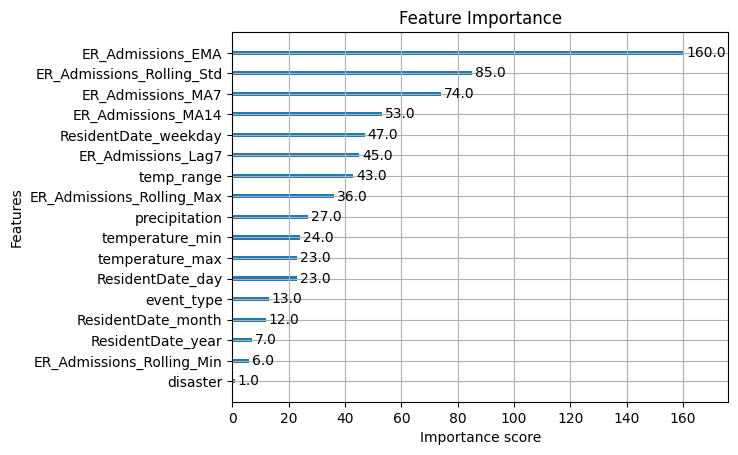

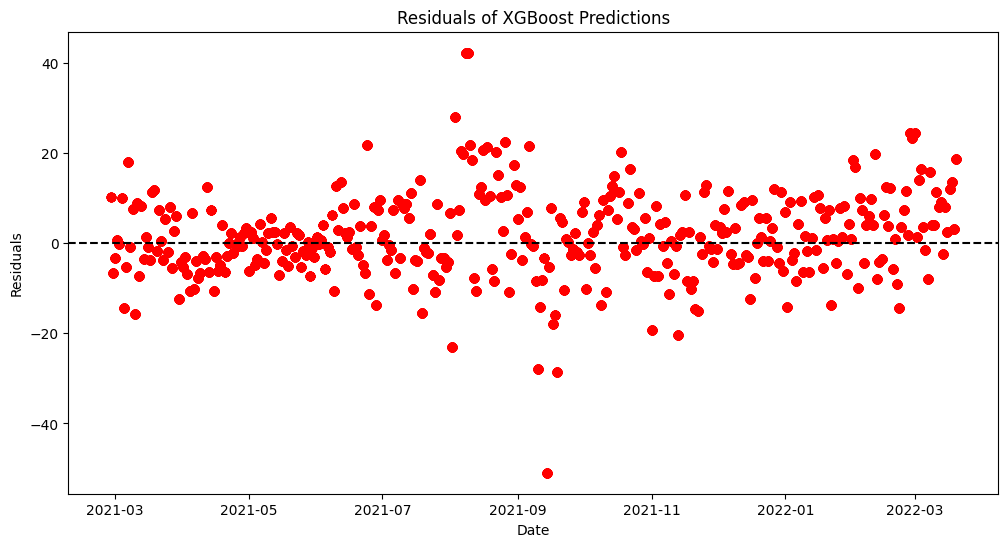

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the cleaned dataset
df = pd.read_csv("/finalproject/feature_engineering/classification_data.csv")

# Convert 'ResidentDate' to datetime format
df['ResidentDate'] = pd.to_datetime(df['ResidentDate'])

# Set 'ResidentDate' as index
df.set_index('ResidentDate', inplace=True)

# Define the target column and features
target = 'ER_Admissions_Lag1'  # Replace with actual target column
features = [col for col in df.columns if col != target]

# Separate features and target
X = df[features]
y = df[target]

# Convert categorical columns into numerical if needed
# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Apply LabelEncoding to categorical columns
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    X[col] = le.fit_transform(X[col].astype(str))

# Train-test split (Time series typically uses time order, so don't shuffle)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# ========== Hyperparameter Tuning for XGBoost ==========

# Define hyperparameters grid for XGBoost
xgb_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Set up GridSearchCV for XGBoost
xgb_grid_search = GridSearchCV(estimator=xgb.XGBRegressor(), param_grid=xgb_param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)

# Best XGBoost hyperparameters
print(f"Best XGBoost Parameters: {xgb_grid_search.best_params_}")

# Best model predictions
xgb_best_model = xgb_grid_search.best_estimator_
xgb_pred = xgb_best_model.predict(X_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
print(f"XGBoost RMSE after Hyperparameter Tuning: {xgb_rmse}")

# Calculate additional metrics
mae = mean_absolute_error(y_test, xgb_pred)
r2 = r2_score(y_test, xgb_pred)

print(f"XGBoost MAE after Hyperparameter Tuning: {mae}")
print(f"XGBoost R² after Hyperparameter Tuning: {r2}")

# ========== Plot Predictions ==========
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual', color='blue')
plt.plot(y_test.index, xgb_pred, label='XGBoost (Tuned)', color='orange')
plt.legend()
plt.title("XGBoost Predictions vs Actual")
plt.xlabel("Date")
plt.ylabel("ER Admissions")
plt.show()

# ========== Plot Feature Importance ==========
xgb.plot_importance(xgb_best_model,  importance_type='weight', title='Feature Importance')
plt.show()

# ========== Residual Analysis ==========
residuals = y_test - xgb_pred

plt.figure(figsize=(12, 6))
plt.scatter(y_test.index, residuals, color='red', alpha=0.5)
plt.axhline(0, color='black', linestyle='--')
plt.title("Residuals of XGBoost Predictions")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.show()

C:\Users\TottaraDhanush\AppData\Local\Temp\ipykernel_12764\1250132818.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].astype(str))
C:\Users\TottaraDhanush\AppData\Local\Temp\ipykernel_12764\1250132818.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].astype(str))
C:\Users\TottaraDhanush\AppData\Local\Temp\ipykernel_12764\1250132818.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

XGBoost RMSE on Test Set: 11.54931561870021
XGBoost MAE on Test Set: 8.120268059335961
XGBoost R² on Test Set: 0.8168857268663964


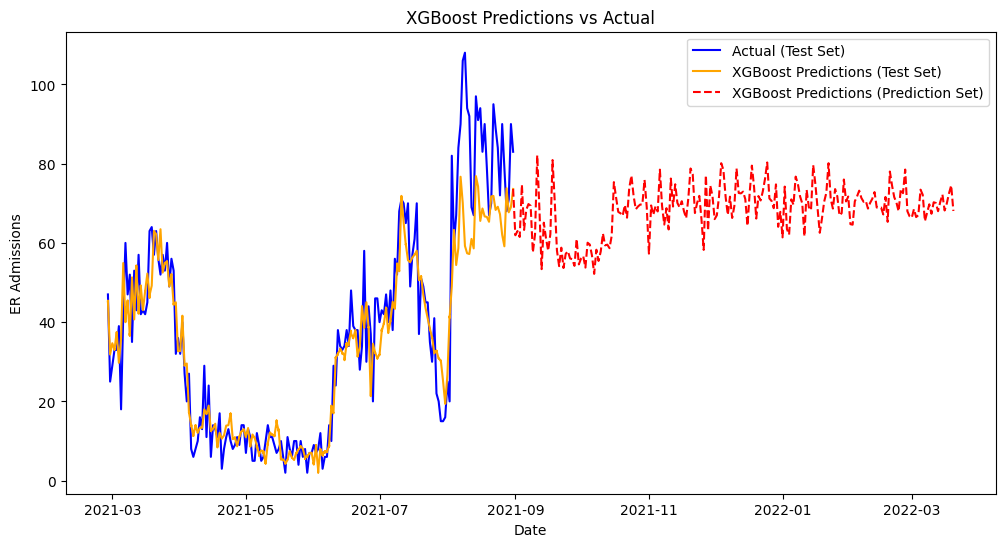

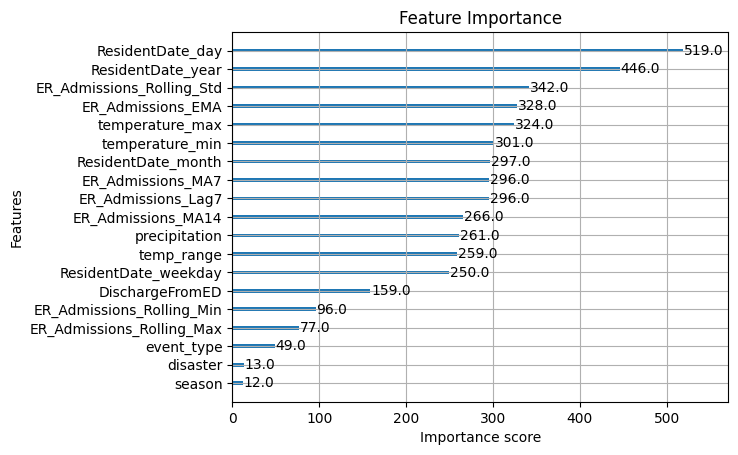

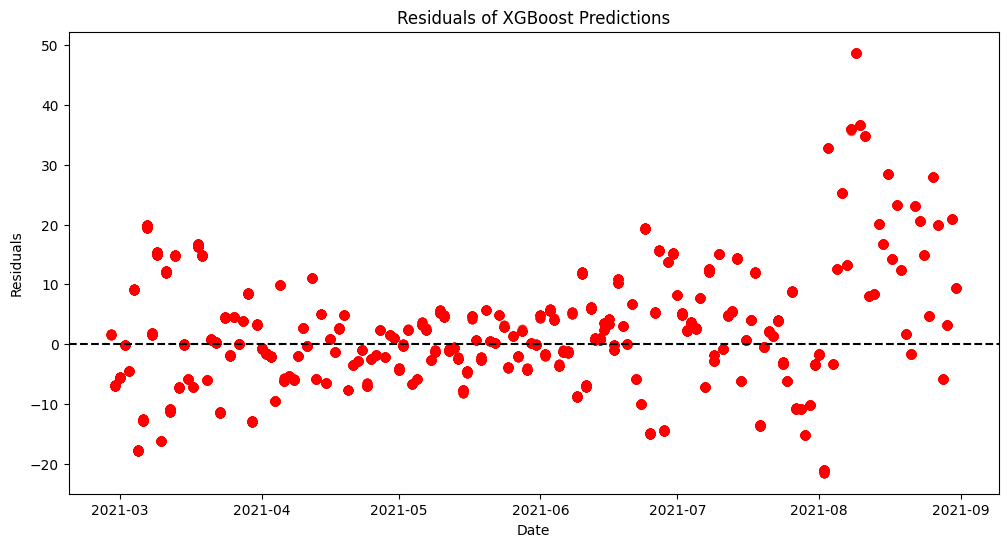

In [9]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the cleaned dataset
df = pd.read_csv("/finalproject/feature_engineering/classification_data.csv")

# Convert 'ResidentDate' to datetime format
df['ResidentDate'] = pd.to_datetime(df['ResidentDate'])

# Set 'ResidentDate' as index
df.set_index('ResidentDate', inplace=True)

# Define the target column and features
target = 'ER_Admissions_Lag1'  # Replace with actual target column
features = [col for col in df.columns if col != target]

# Separate features and target
X = df[features]
y = df[target]

# Convert categorical columns into numerical if needed
categorical_columns = X.select_dtypes(include=['object']).columns
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    X[col] = le.fit_transform(X[col].astype(str))

# Split the data into 80% training, 10% testing, and 10% for predictions
train_size = int(len(X) * 0.8)
test_size = int(len(X) * 0.1)

X_train = X.iloc[:train_size]
y_train = y.iloc[:train_size]

X_test = X.iloc[train_size:train_size + test_size]
y_test = y.iloc[train_size:train_size + test_size]

X_pred = X.iloc[train_size + test_size:]

# ========== Train the XGBoost Model ==========
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
xgb_test_pred = xgb_model.predict(X_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_test_pred))
print(f"XGBoost RMSE on Test Set: {xgb_rmse}")

# Make predictions on the prediction set
xgb_pred = xgb_model.predict(X_pred)

# Calculate additional metrics
mae = mean_absolute_error(y_test, xgb_test_pred)
r2 = r2_score(y_test, xgb_test_pred)

print(f"XGBoost MAE on Test Set: {mae}")
print(f"XGBoost R² on Test Set: {r2}")

# ========== Plot Predictions ==========
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual (Test Set)', color='blue')
plt.plot(y_test.index, xgb_test_pred, label='XGBoost Predictions (Test Set)', color='orange')
plt.plot(X_pred.index, xgb_pred , label='XGBoost Predictions (Prediction Set)', color='red', linestyle='--')

plt.legend()
plt.title("XGBoost Predictions vs Actual")
plt.xlabel("Date")
plt.ylabel("ER Admissions")
plt.show()

# ========== Plot Feature Importance ==========
xgb.plot_importance(xgb_model,  importance_type='weight', title='Feature Importance')
plt.show()

# ========== Residual Analysis ==========
residuals = y_test - xgb_test_pred

plt.figure(figsize=(12, 6))
plt.scatter(y_test.index, residuals, color='red', alpha=0.5)
plt.axhline(0, color='black', linestyle='--')
plt.title("Residuals of XGBoost Predictions")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.show()